# NBA Shot Predictor - Classification(Make/Miss)

In [1]:
#importing all libraries  

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [4]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelBinarizer, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, make_union
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer as Imputer

In [9]:
from sklearn.ensemble import RandomForestClassifier

#1  PREDICT THE NBA SHOT OUTCOME USING PREDICTORS...

#2.  RECCOMMEND SHOTS/PLAYS FOR MAXIMAL SUCCESS DEPENDING ON TEAM 

In [2]:
#read in data(csv file) as pandas dataframe

In [10]:
df = pd.read_csv(r"C:\Users\durge\Projects\GA\DSI20-lessons\projects\project-capstone\archive (4)\NBA_PBP_2015-16.csv")

In [3]:
#basic dataframe exploration 

In [11]:
df.head()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,720,DET,Jump ball: A. Drummond vs. A. Horford (E. lyas...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A. Drummond - drumman01,A. Horford - horfoal01,E. İlyasova - ilyaser01
1,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,701,DET,A. Drummond misses 2-pt layup from 1 ft (block...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,699,DET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,697,DET,NaN,...,NaN,NaN,NaN,K. Bazemore - bazemke01,bad pass,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,681,DET,M. Morris makes 2-pt jump shot from 13 ft (ass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.tail()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
601552,/boxscores/201606190GSW.html,playoff,Oracle Arena Oakland California,June 19 2016,8:00 PM,CLE,4,2,CLE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601553,/boxscores/201606190GSW.html,playoff,Oracle Arena Oakland California,June 19 2016,8:00 PM,CLE,4,1,CLE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601554,/boxscores/201606190GSW.html,playoff,Oracle Arena Oakland California,June 19 2016,8:00 PM,CLE,4,0,CLE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601555,/boxscores/201606190GSW.html,playoff,Oracle Arena Oakland California,June 19 2016,8:00 PM,CLE,4,0,CLE,End of 4th quarter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601556,/boxscores/201606190GSW.html,playoff,Oracle Arena Oakland California,June 19 2016,8:00 PM,CLE,4,0,CLE,End of Game,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['URL', 'GameType', 'Location', 'Date', 'Time', 'WinningTeam', 'Quarter',
       'SecLeft', 'AwayTeam', 'AwayPlay', 'AwayScore', 'HomeTeam', 'HomePlay',
       'HomeScore', 'Shooter', 'ShotType', 'ShotOutcome', 'ShotDist',
       'Assister', 'Blocker', 'FoulType', 'Fouler', 'Fouled', 'Rebounder',
       'ReboundType', 'ViolationPlayer', 'ViolationType', 'TimeoutTeam',
       'FreeThrowShooter', 'FreeThrowOutcome', 'FreeThrowNum', 'EnterGame',
       'LeaveGame', 'TurnoverPlayer', 'TurnoverType', 'TurnoverCause',
       'TurnoverCauser', 'JumpballAwayPlayer', 'JumpballHomePlayer',
       'JumpballPoss'],
      dtype='object')

In [14]:
df.shape

(601557, 40)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601557 entries, 0 to 601556
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   URL                 601557 non-null  object 
 1   GameType            601557 non-null  object 
 2   Location            601557 non-null  object 
 3   Date                601557 non-null  object 
 4   Time                601557 non-null  object 
 5   WinningTeam         601557 non-null  object 
 6   Quarter             601557 non-null  int64  
 7   SecLeft             601557 non-null  int64  
 8   AwayTeam            601557 non-null  object 
 9   AwayPlay            304900 non-null  object 
 10  AwayScore           601557 non-null  int64  
 11  HomeTeam            601557 non-null  object 
 12  HomePlay            296610 non-null  object 
 13  HomeScore           601557 non-null  int64  
 14  Shooter             222288 non-null  object 
 15  ShotType            222288 non-nul

In [16]:
df.dtypes

URL                    object
GameType               object
Location               object
Date                   object
Time                   object
WinningTeam            object
Quarter                 int64
SecLeft                 int64
AwayTeam               object
AwayPlay               object
AwayScore               int64
HomeTeam               object
HomePlay               object
HomeScore               int64
Shooter                object
ShotType               object
ShotOutcome            object
ShotDist              float64
Assister               object
Blocker                object
FoulType               object
Fouler                 object
Fouled                 object
Rebounder              object
ReboundType            object
ViolationPlayer        object
ViolationType          object
TimeoutTeam            object
FreeThrowShooter       object
FreeThrowOutcome       object
FreeThrowNum           object
EnterGame              object
LeaveGame              object
TurnoverPl

In [17]:
df.describe()

,Quarter,SecLeft,AwayScore,HomeScore,ShotDist
count,601557.000000,601557.000000,601557.000000,601557.000000,222288.000000
mean,2.553592,327.739903,51.974207,53.727811,12.526772
std,1.140991,208.249310,30.479133,31.284349,10.012532
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,147.000000,26.000000,27.000000,2.000000
50%,3.000000,321.000000,51.000000,53.000000,13.000000
75%,4.000000,505.000000,77.000000,79.000000,23.000000
max,8.000000,720.000000,147.000000,144.000000,88.000000


In [18]:
df.describe(include='object')

,URL,GameType,Location,Date,Time,WinningTeam,AwayTeam,AwayPlay,HomeTeam,HomePlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
count,601557,601557,601557,601557,601557,601557,601557,304900,601557,296610,...,61520,58999,58999,37660,37660,20571,20571,2022,2022,2022
unique,1316,2,31,210,21,30,30,87361,30,83702,...,7,478,471,466,25,1,461,264,269,337
top,/boxscores/201512180CHI.html,regular,STAPLES Center Los Angeles California,October 28 2015,8:00 PM,GSW,GSW,Offensive rebound by Team,GSW,Offensive rebound by Team,...,1 of 2,T. Sefolosha - sefolth01,D. Nowitzki - nowitdi01,Team,bad pass,steal,R. Westbrook - westbru01,S. Adams - adamsst01,K. Towns - townska01,S. Ibaka - ibakase01
freq,695,562317,39135,6662,144895,41062,24125,8146,25367,8192,...,26102,381,443,1571,17624,20571,209,102,86,44


In [4]:
#drop unneccesary columns

In [19]:
df = df.drop(['URL','Location','Date','Time'],axis=1)

In [20]:
df = df[df['ShotOutcome'].notna()]

In [21]:
df

,GameType,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
1,regular,DET,1,701,DET,A. Drummond misses 2-pt layup from 1 ft (block...,0,ATL,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,regular,DET,1,681,DET,M. Morris makes 2-pt jump shot from 13 ft (ass...,2,ATL,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,regular,DET,1,660,DET,NaN,2,ATL,P. Millsap makes 2-pt jump shot from 12 ft (as...,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,regular,DET,1,644,DET,K. Caldwell-Pope makes 2-pt jump shot from 8 f...,4,ATL,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,regular,DET,1,627,DET,NaN,4,ATL,A. Horford misses 2-pt jump shot from 20 ft,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601535,playoff,CLE,4,53,CLE,K. Irving makes 3-pt jump shot from 25 ft,92,GSW,NaN,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601536,playoff,CLE,4,31,CLE,NaN,92,GSW,S. Curry misses 3-pt jump shot from 26 ft,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601538,playoff,CLE,4,23,CLE,K. Irving misses 2-pt layup from 3 ft (block b...,92,GSW,NaN,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601551,playoff,CLE,4,2,CLE,NaN,93,GSW,S. Curry misses 3-pt jump shot from 26 ft,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.ShotOutcome

1         miss
4         make
5         make
6         make
7         miss
          ... 
601535    make
601536    miss
601538    miss
601551    miss
601553    miss
Name: ShotOutcome, Length: 222288, dtype: object

In [23]:
df.nunique()

GameType                  2
WinningTeam              30
Quarter                   8
SecLeft                 720
AwayTeam                 30
AwayPlay              42859
AwayScore               143
HomeTeam                 30
HomePlay              41120
HomeScore               144
Shooter                 477
ShotType                  7
ShotOutcome               2
ShotDist                 89
Assister                462
Blocker                 444
FoulType                  0
Fouler                    0
Fouled                    0
Rebounder                 0
ReboundType               0
ViolationPlayer           0
ViolationType             0
TimeoutTeam               0
FreeThrowShooter          0
FreeThrowOutcome          0
FreeThrowNum              0
EnterGame                 0
LeaveGame                 0
TurnoverPlayer            0
TurnoverType              0
TurnoverCause             0
TurnoverCauser            0
JumpballAwayPlayer        0
JumpballHomePlayer        0
JumpballPoss        

In [5]:
#finding categorical and numerical variables 

In [25]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 31 categorical variables

The categorical variables are : ['GameType', 'WinningTeam', 'AwayTeam', 'AwayPlay', 'HomeTeam', 'HomePlay', 'Shooter', 'ShotType', 'ShotOutcome', 'Assister', 'Blocker', 'FoulType', 'Fouler', 'Fouled', 'Rebounder', 'ReboundType', 'ViolationPlayer', 'ViolationType', 'TimeoutTeam', 'FreeThrowShooter', 'FreeThrowOutcome', 'FreeThrowNum', 'EnterGame', 'LeaveGame', 'TurnoverPlayer', 'TurnoverType', 'TurnoverCause', 'TurnoverCauser', 'JumpballAwayPlayer', 'JumpballHomePlayer', 'JumpballPoss']


In [26]:
df[categorical].head()

,GameType,WinningTeam,AwayTeam,AwayPlay,HomeTeam,HomePlay,Shooter,ShotType,ShotOutcome,Assister,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
1,regular,DET,DET,A. Drummond misses 2-pt layup from 1 ft (block...,ATL,NaN,A. Drummond - drumman01,2-pt layup,miss,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,regular,DET,DET,M. Morris makes 2-pt jump shot from 13 ft (ass...,ATL,NaN,M. Morris - morrima03,2-pt jump shot,make,A. Drummond - drumman01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,regular,DET,DET,NaN,ATL,P. Millsap makes 2-pt jump shot from 12 ft (as...,P. Millsap - millspa01,2-pt jump shot,make,K. Korver - korveky01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,regular,DET,DET,K. Caldwell-Pope makes 2-pt jump shot from 8 f...,ATL,NaN,K. Caldwell-Pope - caldwke01,2-pt jump shot,make,E. İlyasova - ilyaser01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,regular,DET,DET,NaN,ATL,A. Horford misses 2-pt jump shot from 20 ft,A. Horford - horfoal01,2-pt jump shot,miss,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df[categorical].isnull().sum()

GameType                   0
WinningTeam                0
AwayTeam                   0
AwayPlay              111195
HomeTeam                   0
HomePlay              111093
Shooter                    0
ShotType                   0
ShotOutcome                0
Assister              164076
Blocker               209257
FoulType              222288
Fouler                222288
Fouled                222288
Rebounder             222288
ReboundType           222288
ViolationPlayer       222288
ViolationType         222288
TimeoutTeam           222288
FreeThrowShooter      222288
FreeThrowOutcome      222288
FreeThrowNum          222288
EnterGame             222288
LeaveGame             222288
TurnoverPlayer        222288
TurnoverType          222288
TurnoverCause         222288
TurnoverCauser        222288
JumpballAwayPlayer    222288
JumpballHomePlayer    222288
JumpballPoss          222288
dtype: int64

In [28]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['Quarter', 'SecLeft', 'AwayScore', 'HomeScore', 'ShotDist']


In [29]:
df[numerical].head()

,Quarter,SecLeft,AwayScore,HomeScore,ShotDist
1,1,701,0,0,1.0
4,1,681,2,0,13.0
5,1,660,2,2,12.0
6,1,644,4,2,8.0
7,1,627,4,2,20.0


In [30]:
df[numerical].isnull().sum()

Quarter      0
SecLeft      0
AwayScore    0
HomeScore    0
ShotDist     0
dtype: int64

In [6]:
#plot numerical variables

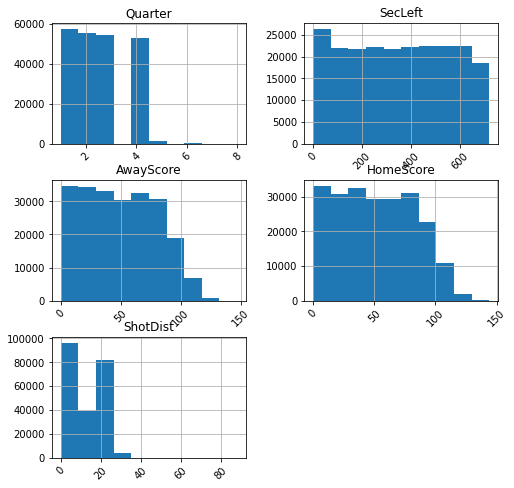

In [31]:
df[numerical].hist(figsize=(8,8), xrot=45)
plt.show()


In [32]:
df[numerical].describe()

,Quarter,SecLeft,AwayScore,HomeScore,ShotDist
count,222288.000000,222288.000000,222288.000000,222288.000000,222288.000000
mean,2.484754,348.589218,49.695823,51.431089,12.526772
std,1.138851,208.184780,30.290506,31.204759,10.012532
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,168.000000,24.000000,25.000000,2.000000
50%,2.000000,350.000000,49.000000,50.000000,13.000000
75%,3.000000,529.000000,74.000000,77.000000,23.000000
max,8.000000,720.000000,147.000000,144.000000,88.000000


In [7]:
#plot the shot outcome

In [ ]:
sns.pairplot(df, hue="ShotOutcome")

<AxesSubplot:>

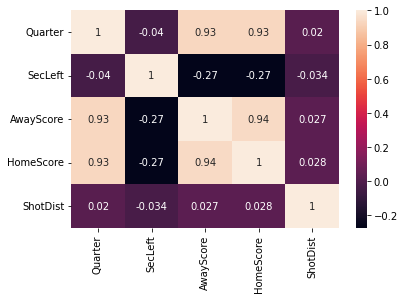

In [23]:
sns.heatmap(df.corr(), annot=True)

In [175]:
#Plot categorical distributions

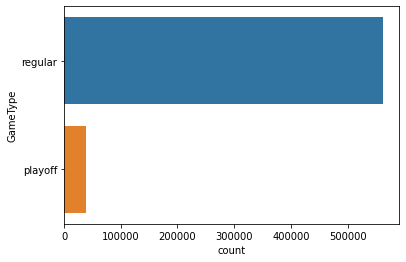

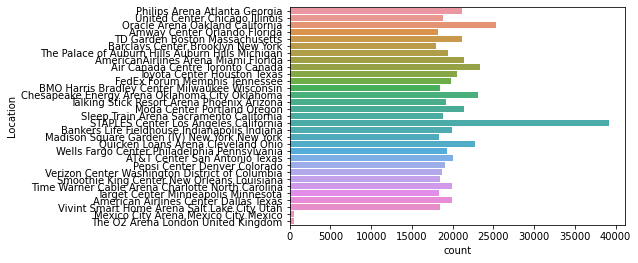

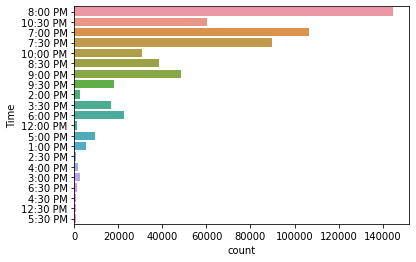

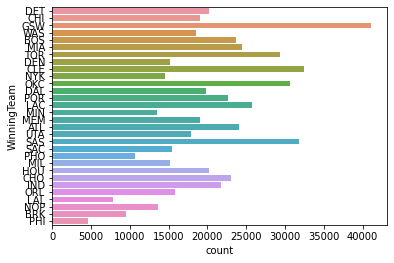

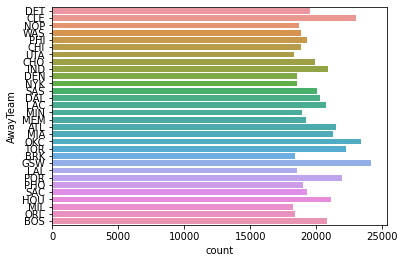

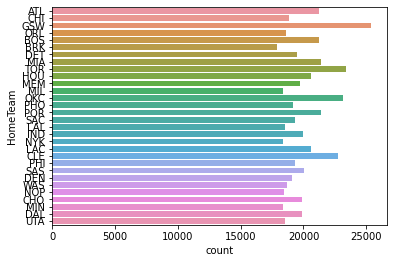

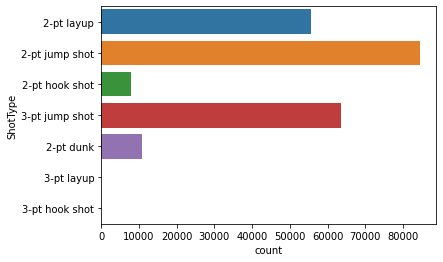

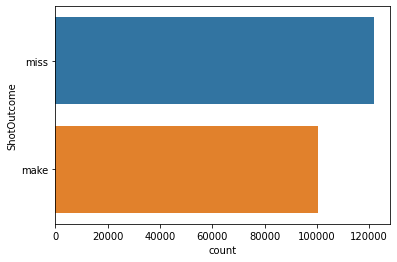

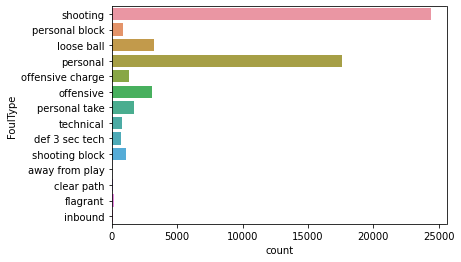

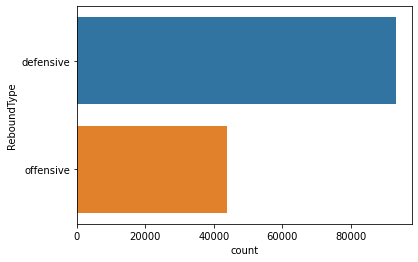

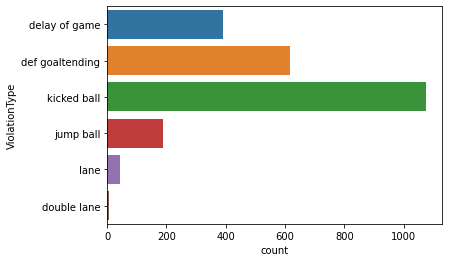

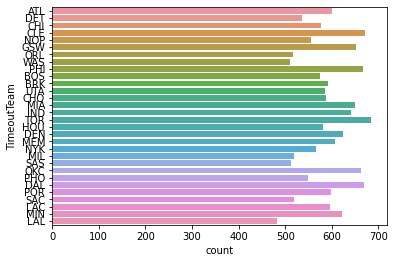

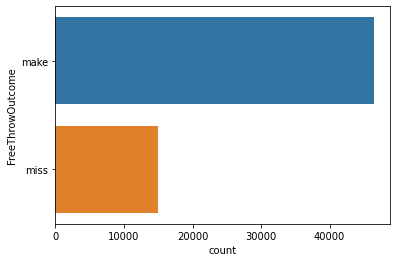

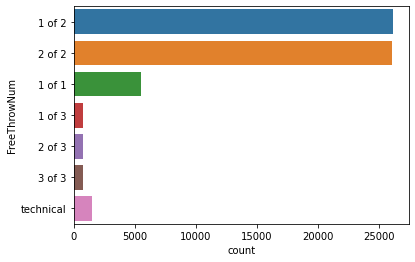

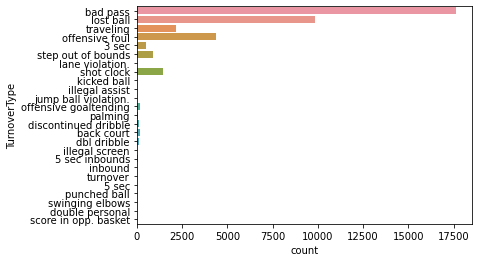

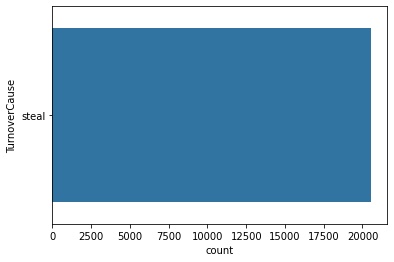

In [197]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 40:
        sns.countplot(y=col, data=df)
        plt.show()

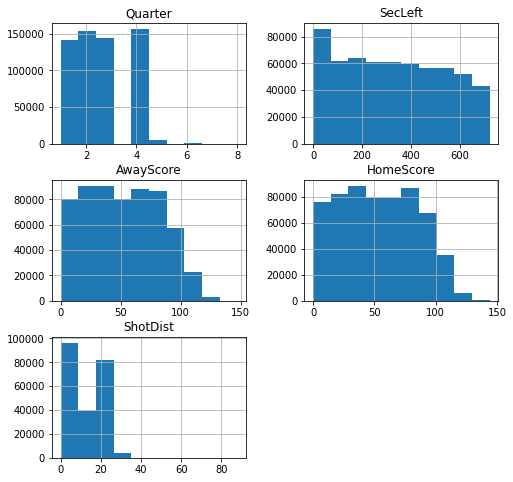

In [198]:
df.hist(figsize=(8,8))
plt.show()


In [8]:
#number of values for each column

In [26]:
for i in df.columns:
    x = df[i].value_counts()
    print("Column name is:",i,"and it value is:",x)


Column name is: GameType and it value is: regular    562317
playoff     39240
Name: GameType, dtype: int64
Column name is: WinningTeam and it value is: GSW    41062
CLE    32389
SAS    31759
OKC    30696
TOR    29334
LAC    25803
MIA    24444
ATL    24067
BOS    23675
CHO    22984
POR    22680
IND    21817
HOU    20212
DET    20185
DAL    19826
MEM    19092
CHI    19084
WAS    18520
UTA    17862
ORL    15795
SAC    15476
DEN    15235
MIL    15193
NYK    14563
NOP    13603
MIN    13503
PHO    10697
BRK     9565
LAL     7811
PHI     4625
Name: WinningTeam, dtype: int64
Column name is: Quarter and it value is: 4    157105
2    153460
3    144098
1    141712
5      4492
6       572
8        67
7        51
Name: Quarter, dtype: int64
Column name is: SecLeft and it value is: 0      11720
1       2921
2       2079
3       1668
60      1565
       ...  
715       15
716       12
718       11
717        8
719        5
Name: SecLeft, Length: 721, dtype: int64
Column name is: AwayTeam and it valu

Column name is: JumpballHomePlayer and it value is: K. Towns - townska01          86
M. Plumlee - plumlma01        84
J. Valančiūnas - valanjo01    67
Z. Pachulia - pachuza01       67
C. Zeller - zelleco01         66
                              ..
G. Dragić - dragigo01          1
C. Anthony - anthoca01         1
D. Russell - russeda01         1
R. McCallum - mccalra01        1
J. Johnson - johnsja01         1
Name: JumpballHomePlayer, Length: 269, dtype: int64
Column name is: JumpballPoss and it value is: S. Ibaka - ibakase01       44
R. Jackson - jacksre01     42
T. Young - youngth01       40
T. Parker - parketo01      36
D. Green - greendr01       34
                           ..
R. Holmes - holmeri01       1
S. Hill - hillso01          1
A. Harrison - harriaa01     1
A. Rivers - riverau01       1
L. Barbosa - barbole01      1
Name: JumpballPoss, Length: 337, dtype: int64


In [27]:
for col in df.select_dtypes(include='object'):
    display(pd.crosstab(df['ShotOutcome'], df[col], normalize='index'))
        #display(pd.crosstab(data['target'], data[col]))

GameType,playoff,regular
ShotOutcome,,
make,0.062633,0.937367
miss,0.065638,0.934362


WinningTeam,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
ShotOutcome,,,,,,,,,,,,,,,,,,,,,
make,0.039244,0.038038,0.016752,0.032198,0.038247,0.054810,0.031630,0.025083,0.034142,0.070824,...,0.052428,0.027036,0.007464,0.017599,0.037699,0.026219,0.054929,0.047216,0.027784,0.031840
miss,0.040421,0.040520,0.015991,0.033787,0.039831,0.053403,0.032934,0.025102,0.034000,0.068746,...,0.050492,0.026554,0.007356,0.017951,0.037986,0.025143,0.052870,0.048638,0.029063,0.030261


AwayTeam,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
ShotOutcome,,,,,,,,,,,,,,,,,,,,,
make,0.034311,0.033454,0.032487,0.032208,0.033454,0.038626,0.032866,0.031371,0.032647,0.041008,...,0.039832,0.031750,0.030614,0.031281,0.035497,0.033085,0.034690,0.035905,0.029926,0.031969
miss,0.036083,0.034582,0.031154,0.032598,0.034295,0.038715,0.034049,0.031581,0.032975,0.040085,...,0.038576,0.030859,0.031286,0.031220,0.036034,0.031884,0.033418,0.036895,0.029752,0.030900


AwayPlay,. Ak makes 2-pt dunk at rim,. Ak makes 2-pt dunk at rim (assist by A. Davis),. Ak makes 2-pt dunk at rim (assist by B. Dejean-Jones),. Ak makes 2-pt dunk at rim (assist by E. Gordon),. Ak makes 2-pt dunk at rim (assist by J. Hamilton),. Ak makes 2-pt dunk at rim (assist by J. Holiday),. Ak makes 2-pt dunk at rim (assist by N. Cole),. Ak makes 2-pt dunk at rim (assist by T. Evans),. Ak makes 2-pt hook shot from 3 ft (assist by T. Frazier),. Ak makes 2-pt jump shot from 5 ft (assist by D. Cunningham),...,Z. Randolph misses 2-pt layup from 3 ft,Z. Randolph misses 2-pt layup from 3 ft (block by A. Len),Z. Randolph misses 2-pt layup from 3 ft (block by L. Aldridge),Z. Randolph misses 2-pt layup from 4 ft (block by I. Mahinmi),Z. Randolph misses 3-pt jump shot from 24 ft,Z. Randolph misses 3-pt jump shot from 25 ft,Z. Randolph misses 3-pt jump shot from 26 ft,Z. Randolph misses 3-pt jump shot from 29 ft,Z. Randolph misses 3-pt jump shot from 34 ft,Z. Randolph misses 3-pt jump shot from 69 ft (block by A. Davis)
ShotOutcome,,,,,,,,,,,,,,,,,,,,,
make,0.000061,0.00004,0.00002,0.000081,0.00002,0.00002,0.000101,0.00002,0.00002,0.00002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
miss,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,...,0.000065,0.000016,0.000016,0.000016,0.000049,0.000049,0.000016,0.000016,0.000016,0.000016


HomeTeam,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
ShotOutcome,,,,,,,,,,,,,,,,,,,,,
make,0.034889,0.033504,0.032099,0.03156,0.032537,0.038467,0.032726,0.031162,0.033035,0.043738,...,0.038805,0.031949,0.031401,0.031092,0.035836,0.032786,0.034600,0.037779,0.028641,0.031889
miss,0.035780,0.036181,0.029686,0.03382,0.034558,0.037297,0.032417,0.031007,0.032860,0.042890,...,0.038756,0.031269,0.031614,0.031318,0.035845,0.030974,0.033713,0.038330,0.029793,0.030531


HomePlay,. Ak makes 2-pt dunk at rim,. Ak makes 2-pt dunk at rim (assist by A. Ajina),. Ak makes 2-pt dunk at rim (assist by A. Gee),. Ak makes 2-pt dunk at rim (assist by B. Dejean-Jones),. Ak makes 2-pt dunk at rim (assist by J. Holiday),. Ak makes 2-pt dunk at rim (assist by L. Babbitt),. Ak makes 2-pt dunk at rim (assist by N. Cole),. Ak makes 2-pt dunk at rim (assist by R. Anderson),. Ak makes 2-pt dunk at rim (assist by T. Evans),. Ak makes 2-pt dunk at rim (assist by T. Frazier),...,Z. Randolph misses 2-pt layup from 3 ft (block by D. Green),Z. Randolph misses 2-pt layup from 3 ft (block by K. Leonard),Z. Randolph misses 3-pt jump shot from 22 ft,Z. Randolph misses 3-pt jump shot from 24 ft,Z. Randolph misses 3-pt jump shot from 25 ft,Z. Randolph misses 3-pt jump shot from 26 ft,Z. Randolph misses 3-pt jump shot from 29 ft,Z. Randolph misses 3-pt jump shot from 30 ft,Z. Randolph misses 3-pt jump shot from 51 ft,Z. Randolph misses 3-pt jump shot from 72 ft
ShotOutcome,,,,,,,,,,,,,,,,,,,,,
make,0.000059,0.00002,0.000059,0.000039,0.000098,0.000039,0.000098,0.00002,0.00002,0.00002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
miss,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.000017,0.000017,0.000017,0.000017,0.000017,0.00005,0.000017,0.000017,0.000017,0.000017


Shooter,A. Afflalo - afflaar01,A. Ajinça - ajincal01,A. Aminu - aminual01,A. Anderson - anderal01,A. Bargnani - bargnan01,A. Baynes - baynear01,A. Bennett - bennean01,A. Bogut - bogutan01,A. Bradley - bradlav01,A. Brooks - brookaa01,...,W. Cauley-Stein - caulewi01,W. Ellington - ellinwa01,W. Johnson - johnswe01,W. Matthews - matthwe02,W. Reed - reedwi02,X. Munford - munfoxa02,Z. LaVine - lavinza01,Z. Pachulia - pachuza01,Z. Randolph - randoza01,Ö. Aşık - asikom01
ShotOutcome,,,,,,,,,,,,,,,,,,,,,
make,0.003528,0.001495,0.003538,0.000209,0.001266,0.001973,0.000080,0.002222,0.004614,0.001873,...,0.001903,0.002172,0.002123,0.003498,0.000757,0.000409,0.004315,0.002272,0.004524,0.001036
miss,0.003649,0.001345,0.004035,0.000312,0.001238,0.001599,0.000148,0.001082,0.004683,0.002313,...,0.001214,0.002805,0.002591,0.004617,0.000467,0.000525,0.004322,0.002181,0.004223,0.000754


ShotType,2-pt dunk,2-pt hook shot,2-pt jump shot,2-pt layup,3-pt hook shot,3-pt jump shot,3-pt layup
ShotOutcome,,,,,,,
make,0.097023,0.039164,0.327234,0.312127,0.000010,0.224441,0.000000
miss,0.008069,0.031507,0.423795,0.199482,0.000033,0.337097,0.000016


ShotOutcome,make,miss
ShotOutcome,,
make,1.0,0.0
miss,0.0,1.0


Assister,A. Afflalo - afflaar01,A. Ajinça - ajincal01,A. Aminu - aminual01,A. Anderson - anderal01,A. Bargnani - bargnan01,A. Baynes - baynear01,A. Bogut - bogutan01,A. Bradley - bradlav01,A. Brooks - brookaa01,A. Brown - brownan02,...,W. Cauley-Stein - caulewi01,W. Ellington - ellinwa01,W. Johnson - johnswe01,W. Matthews - matthwe02,W. Reed - reedwi02,X. Munford - munfoxa02,Z. LaVine - lavinza01,Z. Pachulia - pachuza01,Z. Randolph - randoza01,Ö. Aşık - asikom01
ShotOutcome,,,,,,,,,,,,,,,,,,,,,
make,0.002491,0.00055,0.002714,0.000241,0.000309,0.00091,0.003298,0.002731,0.003092,0.000326,...,0.000636,0.001409,0.000876,0.002697,0.000172,0.00055,0.004329,0.002474,0.002542,0.000447


Blocker,A. Afflalo - afflaar01,A. Ajinça - ajincal01,A. Aminu - aminual01,A. Anderson - anderal01,A. Bargnani - bargnan01,A. Baynes - baynear01,A. Bogut - bogutan01,A. Bradley - bradlav01,A. Brooks - brookaa01,A. Brown - brownan02,...,W. Cauley-Stein - caulewi01,W. Ellington - ellinwa01,W. Johnson - johnswe01,W. Matthews - matthwe02,W. Reed - reedwi02,X. Munford - munfoxa02,Z. LaVine - lavinza01,Z. Pachulia - pachuza01,Z. Randolph - randoza01,Ö. Aşık - asikom01
ShotOutcome,,,,,,,,,,,,,,,,,,,,,
miss,0.000767,0.002763,0.004835,0.000077,0.000691,0.00399,0.011358,0.001535,0.000767,0.000384,...,0.005065,0.000384,0.004604,0.001305,0.002302,0.00046,0.001305,0.001765,0.000998,0.001765


FoulType
ShotOutcome


Fouler
ShotOutcome


Fouled
ShotOutcome


Rebounder
ShotOutcome


ReboundType
ShotOutcome


ViolationPlayer
ShotOutcome


ViolationType
ShotOutcome


TimeoutTeam
ShotOutcome


FreeThrowShooter
ShotOutcome


FreeThrowOutcome
ShotOutcome


FreeThrowNum
ShotOutcome


EnterGame
ShotOutcome


LeaveGame
ShotOutcome


TurnoverPlayer
ShotOutcome


TurnoverType
ShotOutcome


TurnoverCause
ShotOutcome


TurnoverCauser
ShotOutcome


JumpballAwayPlayer
ShotOutcome


JumpballHomePlayer
ShotOutcome


JumpballPoss
ShotOutcome


In [194]:
pd.crosstab(df.ShotType,df.ShotOutcome)

ShotOutcome,make,miss
ShotType,,
2-pt dunk,9736,984
2-pt hook shot,3930,3842
2-pt jump shot,32837,51678
2-pt layup,31321,24325
3-pt hook shot,1,4
3-pt jump shot,22522,41106
3-pt layup,0,2


In [30]:
a = pd.crosstab(df.ShotDist,df.ShotOutcome)

In [33]:
a.make.sort_values()

ShotDist
88.0        0
68.0        0
67.0        0
43.0        0
65.0        0
        ...  
25.0     6070
24.0     7477
2.0      8884
1.0     14039
0.0     17422
Name: make, Length: 89, dtype: int64

In [190]:
df.groupby('SecLeft').ShotOutcome.value_counts()

SecLeft  ShotOutcome
0        miss           1509
         make            453
1        miss           1079
         make            360
2        miss            568
                        ... 
717      make              2
718      make              1
719      miss              1
720      miss              3
         make              1
Name: ShotOutcome, Length: 1436, dtype: int64

for col in df.select_dtypes(include='object'):
    
        g = sns.catplot(x = col, kind='count', col = 'ShotOutcome', data=df, sharey=False)
        g.set_xticklabels(rotation=60)


In [202]:
df.shape

(222288, 40)

In [ ]:
#FreeThrows

In [29]:
df.FreeThrowShooter.value_counts()

J. Harden - hardeja01       882
D. DeRozan - derozde01      776
R. Westbrook - westbru01    713
D. Jordan - jordade01       678
D. Cousins - couside01      663
                           ... 
J. Stokes - stokeja01         2
E. Green - greener01          2
C. Hayes - hayesch01          2
S. Novak - novakst01          1
B. Dawson - dawsobr01         1
Name: FreeThrowShooter, Length: 464, dtype: int64

In [30]:
df.FreeThrowShooter.describe()

count                     61520
unique                      464
top       J. Harden - hardeja01
freq                        882
Name: FreeThrowShooter, dtype: object

In [31]:
df.FreeThrowOutcome.value_counts()

make    46516
miss    15004
Name: FreeThrowOutcome, dtype: int64

In [32]:
df_freethrows = pd.DataFrame(df, columns = ['FreeThrowShooter', 'FreeThrowOutcome'])

In [33]:
df_freethrows

,FreeThrowShooter,FreeThrowOutcome
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
601552,NaN,NaN
601553,NaN,NaN
601554,NaN,NaN
601555,NaN,NaN


In [34]:
df_freethrows = df_freethrows.dropna()
df_freethrows

,FreeThrowShooter,FreeThrowOutcome
13,M. Morris - morrima03,make
14,M. Morris - morrima03,miss
31,A. Drummond - drumman01,miss
33,A. Drummond - drumman01,miss
41,P. Millsap - millspa01,make
...,...,...
601499,L. James - jamesle01,make
601500,L. James - jamesle01,make
601501,L. James - jamesle01,make
601543,L. James - jamesle01,miss


In [35]:
df.ShotOutcome.unique()

array([nan, 'miss', 'make'], dtype=object)

In [ ]:
#Kernel Distribution Plots of the numerical Variables

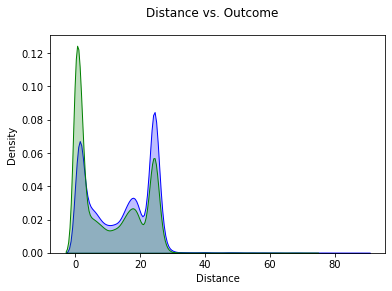

In [36]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["ShotOutcome"]=='miss']["ShotDist"], shade=True, color="blue", label="missed", ax=ax)
sns.kdeplot(df[df["ShotOutcome"]=='make']["ShotDist"], shade=True, color="green", label="made", ax=ax)

ax.set_xlabel("Distance")
ax.set_ylabel("Density")

fig.suptitle("Distance vs. Outcome");


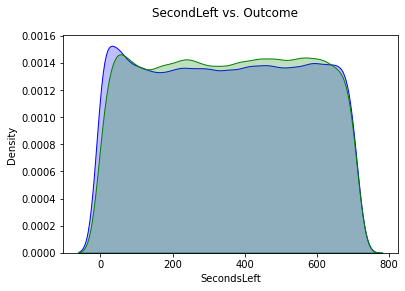

In [24]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["ShotOutcome"]=='miss']["SecLeft"], shade=True, color="blue", label="missed", ax=ax)
sns.kdeplot(df[df["ShotOutcome"]=='make']["SecLeft"], shade=True, color="green", label="made", ax=ax)

ax.set_xlabel("SecondsLeft")
ax.set_ylabel("Density")

fig.suptitle("SecondLeft vs. Outcome");


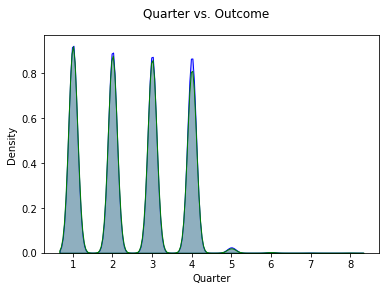

In [206]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["ShotOutcome"]=='miss']["Quarter"], shade=True, color="blue", label="missed", ax=ax)
sns.kdeplot(df[df["ShotOutcome"]=='make']["Quarter"], shade=True, color="green", label="made", ax=ax)

ax.set_xlabel("Quarter")
ax.set_ylabel("Density")

fig.suptitle("Quarter vs. Outcome");


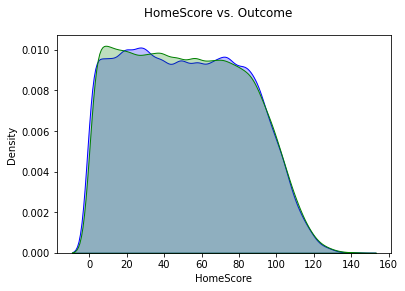

In [204]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["ShotOutcome"]=='miss']["HomeScore"], shade=True, color="blue", label="missed", ax=ax)
sns.kdeplot(df[df["ShotOutcome"]=='make']["HomeScore"], shade=True, color="green", label="made", ax=ax)

ax.set_xlabel("HomeScore")
ax.set_ylabel("Density")

fig.suptitle("HomeScore vs. Outcome");


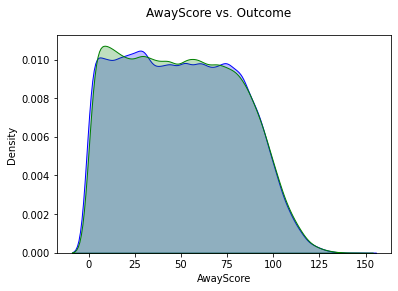

In [207]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["ShotOutcome"]=='miss']["AwayScore"], shade=True, color="blue", label="missed", ax=ax)
sns.kdeplot(df[df["ShotOutcome"]=='make']["AwayScore"], shade=True, color="green", label="made", ax=ax)

ax.set_xlabel("AwayScore")
ax.set_ylabel("Density")

fig.suptitle("AwayScore vs. Outcome");


In [ ]:
#Catplots of categorical variables - not too substantial.

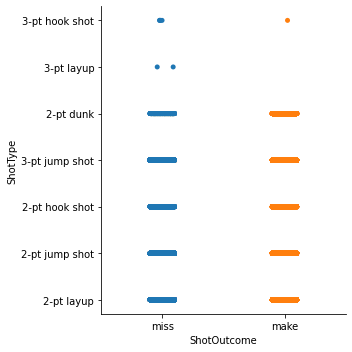

In [210]:
sns.catplot(x="ShotOutcome", y="ShotType", data=df)


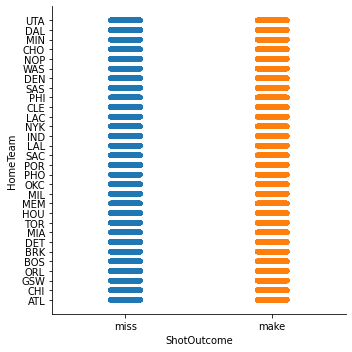

In [212]:
sns.catplot(x="ShotOutcome", y="HomeTeam", data=df)


In [184]:
df.ShotType.value_counts()

2-pt jump shot    84515
3-pt jump shot    63628
2-pt layup        55646
2-pt dunk         10720
2-pt hook shot     7772
3-pt hook shot        5
3-pt layup            2
Name: ShotType, dtype: int64

In [25]:
df.Shooter.value_counts().head(10)

S. Curry - curryst01        1933
K. Thompson - thompkl01     1838
R. Westbrook - westbru01    1837
L. James - jamesle01        1833
K. Durant - duranke01       1787
D. DeRozan - derozde01      1775
J. Harden - hardeja01       1717
D. Lillard - lillada01      1716
C. McCollum - mccolcj01     1629
P. George - georgpa01       1571
Name: Shooter, dtype: int64

In [28]:
shooter_shots = df[['ShotOutcome','Shooter']]

In [15]:
shooter_shots.sort_values(by = 'Shooter')

,ShotOutcome,Shooter
310821,miss,A. Afflalo - afflaar01
261562,make,A. Afflalo - afflaar01
116254,make,A. Afflalo - afflaar01
116252,make,A. Afflalo - afflaar01
261556,make,A. Afflalo - afflaar01
...,...,...
601550,NaN,NaN
601552,NaN,NaN
601554,NaN,NaN
601555,NaN,NaN


In [16]:
df.ShotType.value_counts()

2-pt jump shot    84515
3-pt jump shot    63628
2-pt layup        55646
2-pt dunk         10720
2-pt hook shot     7772
3-pt hook shot        5
3-pt layup            2
Name: ShotType, dtype: int64

In [17]:
df.ShotDist.value_counts().head()

1.0     24071
0.0     22635
24.0    20538
2.0     17911
25.0    17222
Name: ShotDist, dtype: int64

In [ ]:
#Categorical Plots

(0.0, 10.0)

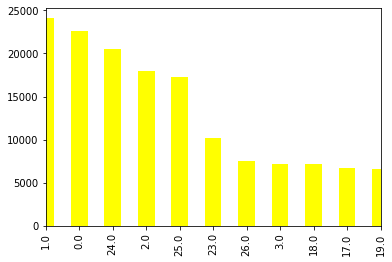

In [36]:
ts = df.ShotDist.value_counts().plot(kind='bar',color='teal')
ts.set_xlim(0,10)


(0.0, 10.0)

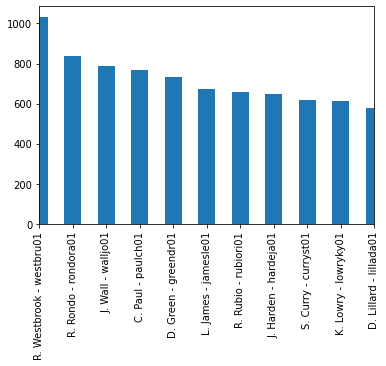

In [219]:
ts = df.Assister.value_counts().plot(kind='bar')
ts.set_xlim(0,10)

(0.0, 10.0)

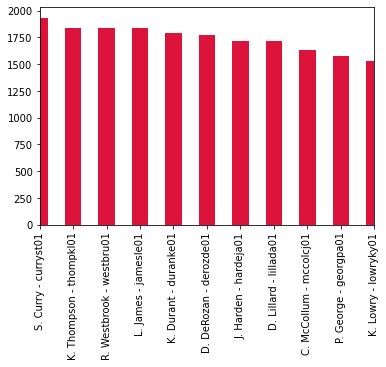

In [239]:
ts = df.Shooter.value_counts().plot(kind='bar',color='crimson')
ts.set_xlim(0,10)

(0.0, 10.0)

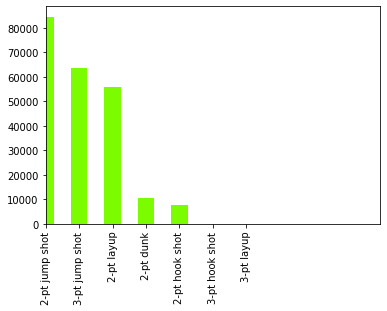

In [238]:
ts = df.ShotType.value_counts().plot(kind='bar',color='lawngreen')
ts.set_xlim(0,10)

(0.0, 10.0)

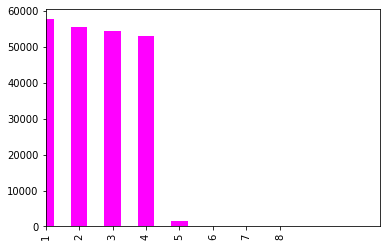

In [236]:
ts = df.Quarter.value_counts().plot(kind='bar',color='magenta')
ts.set_xlim(0,10)

(0.0, 10.0)

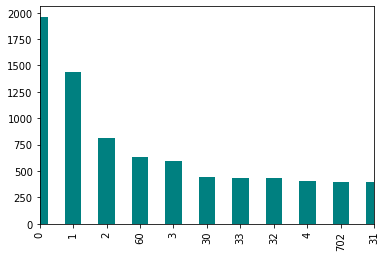

In [235]:
ts = df.SecLeft.value_counts().plot(kind='bar',color ='teal')
ts.set_xlim(0,10)

In [22]:
df.ShotOutcome.value_counts()

miss    121941
make    100347
Name: ShotOutcome, dtype: int64

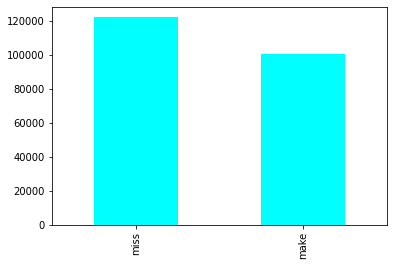

In [234]:
df["ShotOutcome"].value_counts().plot.bar(color = 'cyan')

plt.show()


In [21]:
df.SecLeft.max()

720

In [22]:
df.SecLeft.min()

0

In [23]:
df.Quarter.value_counts()

4    157105
2    153460
3    144098
1    141712
5      4492
6       572
8        67
7        51
Name: Quarter, dtype: int64

In [24]:
df.GameType.value_counts()

regular    562317
playoff     39240
Name: GameType, dtype: int64

In [20]:
df.ShotDist.value_counts()

1.0     0.108287
0.0     0.101827
24.0    0.092394
2.0     0.080576
25.0    0.077476
          ...   
79.0    0.000009
85.0    0.000004
84.0    0.000004
87.0    0.000004
88.0    0.000004
Name: ShotDist, Length: 89, dtype: float64

In [53]:
df['ShotType'].isna().sum()

379269

In [59]:
sum(pd.isnull(df['ShotType']))

379269

In [57]:
df['ShotType'].unique()

array([nan, '2-pt layup', '2-pt jump shot', '2-pt hook shot',
       '3-pt jump shot', '2-pt dunk', '3-pt layup', '3-pt hook shot'],
      dtype=object)

<AxesSubplot:>

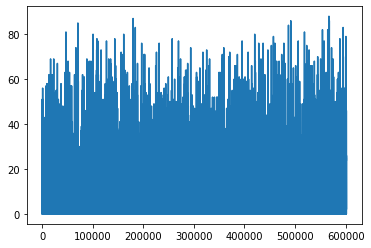

In [25]:
df.ShotDist.plot()

In [29]:
df.ShotOutcome.value_counts()

miss    121941
make    100347
Name: ShotOutcome, dtype: int64

In [ ]:
#Target Variable = Shot Outcome

<AxesSubplot:>

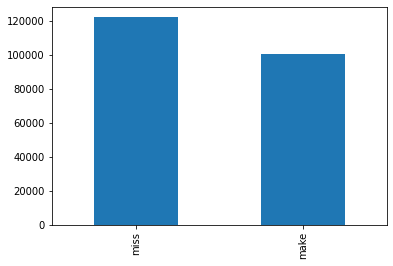

In [30]:
df.ShotOutcome.value_counts().plot(kind = 'bar')

In [31]:
shottype = df[['ShotType']]

In [32]:
shottype

,ShotType
0,NaN
1,2-pt layup
2,NaN
3,NaN
4,2-pt jump shot
...,...
601552,NaN
601553,3-pt jump shot
601554,NaN
601555,NaN


In [177]:
df[['Shooter','ShotType']]

,Shooter,ShotType
0,NaN,NaN
1,A. Drummond - drumman01,2-pt layup
2,NaN,NaN
3,NaN,NaN
4,M. Morris - morrima03,2-pt jump shot
...,...,...
601552,NaN,NaN
601553,M. Speights - speigma01,3-pt jump shot
601554,NaN,NaN
601555,NaN,NaN


In [44]:
df[['Assister']].value_counts().head(10)

Assister                
R. Westbrook - westbru01    1033
R. Rondo - rondora01         838
J. Wall - walljo01           790
C. Paul - paulch01           766
D. Green - greendr01         732
L. James - jamesle01         672
R. Rubio - rubiori01         657
J. Harden - hardeja01        650
S. Curry - curryst01         617
K. Lowry - lowryky01         613
dtype: int64

In [34]:
correlation = df.corr()

<AxesSubplot:>

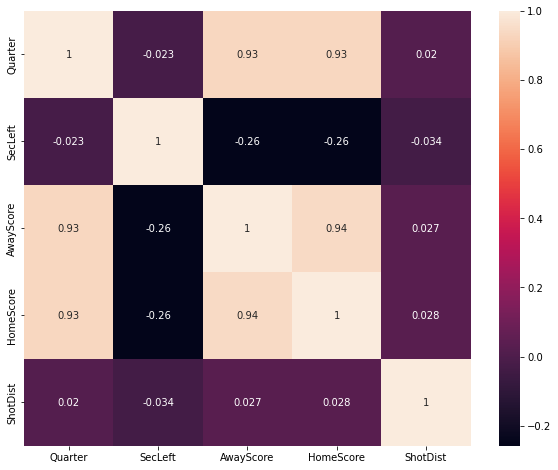

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot = True)

# Initial Modeling

In [9]:
#Setting up a Data Frame for Modeling. - Predictor and Target

In [36]:
df

,GameType,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
1,regular,DET,1,701,DET,A. Drummond misses 2-pt layup from 1 ft (block...,0,ATL,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,regular,DET,1,681,DET,M. Morris makes 2-pt jump shot from 13 ft (ass...,2,ATL,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,regular,DET,1,660,DET,NaN,2,ATL,P. Millsap makes 2-pt jump shot from 12 ft (as...,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,regular,DET,1,644,DET,K. Caldwell-Pope makes 2-pt jump shot from 8 f...,4,ATL,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,regular,DET,1,627,DET,NaN,4,ATL,A. Horford misses 2-pt jump shot from 20 ft,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601535,playoff,CLE,4,53,CLE,K. Irving makes 3-pt jump shot from 25 ft,92,GSW,NaN,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601536,playoff,CLE,4,31,CLE,NaN,92,GSW,S. Curry misses 3-pt jump shot from 26 ft,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601538,playoff,CLE,4,23,CLE,K. Irving misses 2-pt layup from 3 ft (block b...,92,GSW,NaN,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601551,playoff,CLE,4,2,CLE,NaN,93,GSW,S. Curry misses 3-pt jump shot from 26 ft,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.columns

Index(['GameType', 'WinningTeam', 'Quarter', 'SecLeft', 'AwayTeam', 'AwayPlay',
       'AwayScore', 'HomeTeam', 'HomePlay', 'HomeScore', 'Shooter', 'ShotType',
       'ShotOutcome', 'ShotDist', 'Assister', 'Blocker', 'FoulType', 'Fouler',
       'Fouled', 'Rebounder', 'ReboundType', 'ViolationPlayer',
       'ViolationType', 'TimeoutTeam', 'FreeThrowShooter', 'FreeThrowOutcome',
       'FreeThrowNum', 'EnterGame', 'LeaveGame', 'TurnoverPlayer',
       'TurnoverType', 'TurnoverCause', 'TurnoverCauser', 'JumpballAwayPlayer',
       'JumpballHomePlayer', 'JumpballPoss'],
      dtype='object')

In [38]:
df_df = df[['Quarter','SecLeft','Shooter','ShotType','ShotDist','ShotOutcome','Assister']]

In [40]:
df_df

,Quarter,SecLeft,Shooter,ShotType,ShotDist,ShotOutcome,Assister
1,1,701,A. Drummond - drumman01,2-pt layup,1.0,miss,NaN
4,1,681,M. Morris - morrima03,2-pt jump shot,13.0,make,A. Drummond - drumman01
5,1,660,P. Millsap - millspa01,2-pt jump shot,12.0,make,K. Korver - korveky01
6,1,644,K. Caldwell-Pope - caldwke01,2-pt jump shot,8.0,make,E. İlyasova - ilyaser01
7,1,627,A. Horford - horfoal01,2-pt jump shot,20.0,miss,NaN
...,...,...,...,...,...,...,...
601535,4,53,K. Irving - irvinky01,3-pt jump shot,25.0,make,NaN
601536,4,31,S. Curry - curryst01,3-pt jump shot,26.0,miss,NaN
601538,4,23,K. Irving - irvinky01,2-pt layup,3.0,miss,NaN
601551,4,2,S. Curry - curryst01,3-pt jump shot,26.0,miss,NaN


In [41]:
X= df_df[['Quarter', 'SecLeft', 'Shooter', 'ShotType', 'ShotDist','Assister']]

In [42]:
X

,Quarter,SecLeft,Shooter,ShotType,ShotDist,Assister
1,1,701,A. Drummond - drumman01,2-pt layup,1.0,NaN
4,1,681,M. Morris - morrima03,2-pt jump shot,13.0,A. Drummond - drumman01
5,1,660,P. Millsap - millspa01,2-pt jump shot,12.0,K. Korver - korveky01
6,1,644,K. Caldwell-Pope - caldwke01,2-pt jump shot,8.0,E. İlyasova - ilyaser01
7,1,627,A. Horford - horfoal01,2-pt jump shot,20.0,NaN
...,...,...,...,...,...,...
601535,4,53,K. Irving - irvinky01,3-pt jump shot,25.0,NaN
601536,4,31,S. Curry - curryst01,3-pt jump shot,26.0,NaN
601538,4,23,K. Irving - irvinky01,2-pt layup,3.0,NaN
601551,4,2,S. Curry - curryst01,3-pt jump shot,26.0,NaN


In [43]:
X = pd.get_dummies(X)
X

,Quarter,SecLeft,ShotDist,Shooter_A. Afflalo - afflaar01,Shooter_A. Ajinça - ajincal01,Shooter_A. Aminu - aminual01,Shooter_A. Anderson - anderal01,Shooter_A. Bargnani - bargnan01,Shooter_A. Baynes - baynear01,Shooter_A. Bennett - bennean01,...,Assister_W. Cauley-Stein - caulewi01,Assister_W. Ellington - ellinwa01,Assister_W. Johnson - johnswe01,Assister_W. Matthews - matthwe02,Assister_W. Reed - reedwi02,Assister_X. Munford - munfoxa02,Assister_Z. LaVine - lavinza01,Assister_Z. Pachulia - pachuza01,Assister_Z. Randolph - randoza01,Assister_Ö. Aşık - asikom01
1,1,701,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,681,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,660,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,644,8.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,627,20.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601535,4,53,25.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
601536,4,31,26.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
601538,4,23,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
601551,4,2,26.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y = df_df[['ShotOutcome']]

In [50]:
#baseline frequency

In [45]:
y.value_counts()

ShotOutcome
miss           121941
make           100347
dtype: int64

In [46]:
y.value_counts(normalize=True)

ShotOutcome
miss           0.548572
make           0.451428
dtype: float64

In [47]:
#Train-Test Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [59]:
cols = X_train.columns

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [61]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [62]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
#Logistic Regression  

In [63]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train,y_train)
model.score(X_train,y_train)

c:\users\durge\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8167688241579036

In [68]:
y_pred1 = model.predict_proba(X_test)[:, 1]

In [70]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8862


In [71]:
Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

c:\users\durge\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\durge\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\durge\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\durge\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

Cross validated ROC AUC : 0.8849


In [245]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))


Training set score: 0.8168
Test set score: 0.8152


In [251]:
y_pred_train = model.predict(X_train)

y_pred_train


array(['make', 'miss', 'miss', ..., 'miss', 'miss', 'miss'], dtype=object)

In [252]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.8168


In [249]:
y_pred_lreg = model.predict(X_test)
y_pred_lreg

array(['make', 'make', 'miss', ..., 'make', 'miss', 'miss'], dtype=object)

In [247]:
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[13107  7069]
 [ 1147 23135]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

        make       0.92      0.65      0.76     20176
        miss       0.77      0.95      0.85     24282

    accuracy                           0.82     44458
   macro avg       0.84      0.80      0.81     44458
weighted avg       0.84      0.82      0.81     44458

--------------------------------------------------------------------------------
Accuracy 81.52 %


In [190]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lreg)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[13107  7069]
 [ 1147 23135]]

True Positives(TP) =  13107

True Negatives(TN) =  23135

False Positives(FP) =  7069

False Negatives(FN) =  1147


<AxesSubplot:>

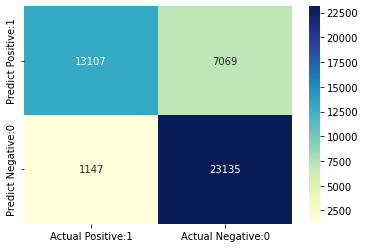

In [191]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [130]:
#Decision Tree

In [223]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [224]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [225]:
y_pred_gini = clf_gini.predict(X_test)


In [226]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.6235


In [227]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini


array(['make', 'miss', 'miss', ..., 'miss', 'make', 'miss'], dtype=object)

In [228]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))


Training-set accuracy score: 0.6245


In [229]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))


Training set score: 0.6245
Test set score: 0.6235


[Text(386.3076923076923, 380.52, 'X[2] <= 0.017\ngini = 0.495\nsamples = 177830\nvalue = [80171, 97659]'),
 Text(206.03076923076924, 271.8, 'X[480] <= 0.5\ngini = 0.44\nsamples = 37419\nvalue = [25171, 12248]'),
 Text(103.01538461538462, 163.07999999999998, 'X[2] <= 0.006\ngini = 0.479\nsamples = 28909\nvalue = [17414, 11495]'),
 Text(51.50769230769231, 54.360000000000014, 'gini = 0.456\nsamples = 9801\nvalue = [6352, 3449]'),
 Text(154.52307692307693, 54.360000000000014, 'gini = 0.488\nsamples = 19108\nvalue = [11062, 8046]'),
 Text(309.04615384615386, 163.07999999999998, 'X[2] <= 0.006\ngini = 0.161\nsamples = 8510\nvalue = [7757, 753]'),
 Text(257.53846153846155, 54.360000000000014, 'gini = 0.157\nsamples = 8342\nvalue = [7626, 716]'),
 Text(360.55384615384617, 54.360000000000014, 'gini = 0.343\nsamples = 168\nvalue = [131, 37]'),
 Text(566.5846153846154, 271.8, 'X[876] <= 0.5\ngini = 0.477\nsamples = 140411\nvalue = [55000, 85411]'),
 Text(515.0769230769231, 163.07999999999998, 'X[

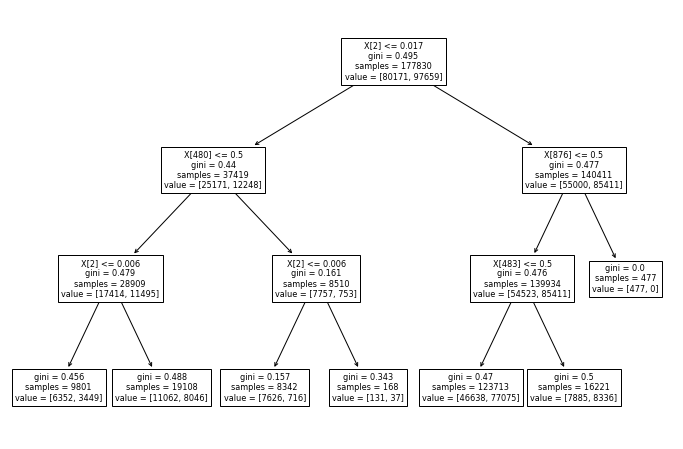

In [230]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 


In [232]:
cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 6434 13742]
 [ 2997 21285]]


In [234]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))


              precision    recall  f1-score   support

        make       0.68      0.32      0.43     20176
        miss       0.61      0.88      0.72     24282

    accuracy                           0.62     44458
   macro avg       0.64      0.60      0.58     44458
weighted avg       0.64      0.62      0.59     44458



In [214]:
print(clf_gini.score(X_train, y_train))
print(cross_val_score(clf_gini, X_train, y_train, cv=5).mean())
print(clf_gini.score(X_test, y_test))

0.6245234212450093
0.6249170556149132
0.6234873363624095


In [215]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini


array(['make', 'miss', 'miss', ..., 'miss', 'make', 'miss'], dtype=object)

In [216]:
from sklearn.metrics import accuracy_score

In [217]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6235


In [218]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['make', 'miss', 'miss', ..., 'miss', 'make', 'miss'], dtype=object)

In [219]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6245


In [220]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.6245
Test set score: 0.6235


[Text(386.3076923076923, 380.52, 'X[2] <= 0.017\ngini = 0.495\nsamples = 177830\nvalue = [80171, 97659]'),
 Text(206.03076923076924, 271.8, 'X[480] <= 0.5\ngini = 0.44\nsamples = 37419\nvalue = [25171, 12248]'),
 Text(103.01538461538462, 163.07999999999998, 'X[2] <= 0.006\ngini = 0.479\nsamples = 28909\nvalue = [17414, 11495]'),
 Text(51.50769230769231, 54.360000000000014, 'gini = 0.456\nsamples = 9801\nvalue = [6352, 3449]'),
 Text(154.52307692307693, 54.360000000000014, 'gini = 0.488\nsamples = 19108\nvalue = [11062, 8046]'),
 Text(309.04615384615386, 163.07999999999998, 'X[2] <= 0.006\ngini = 0.161\nsamples = 8510\nvalue = [7757, 753]'),
 Text(257.53846153846155, 54.360000000000014, 'gini = 0.157\nsamples = 8342\nvalue = [7626, 716]'),
 Text(360.55384615384617, 54.360000000000014, 'gini = 0.343\nsamples = 168\nvalue = [131, 37]'),
 Text(566.5846153846154, 271.8, 'X[876] <= 0.5\ngini = 0.477\nsamples = 140411\nvalue = [55000, 85411]'),
 Text(515.0769230769231, 163.07999999999998, 'X[

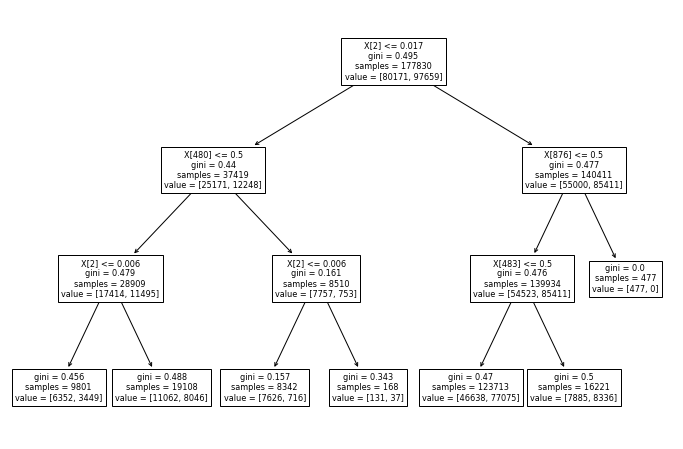

In [207]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [141]:
#RandomForrestss

In [235]:
rfc = RandomForestClassifier(random_state=0,n_estimators =500 ,max_features = 100,max_depth=5)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


C:\Users\durge\AppData\Local\Temp/ipykernel_3324/1191881358.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [236]:
rfc.score(X_train,y_train)

0.6413878423213181

In [238]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score : 0.6411


In [243]:
print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

Training set score: 0.6414
Test set score: 0.6411


In [241]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 7190 12986]
 [ 2968 21314]]


In [242]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        make       0.71      0.36      0.47     20176
        miss       0.62      0.88      0.73     24282

    accuracy                           0.64     44458
   macro avg       0.66      0.62      0.60     44458
weighted avg       0.66      0.64      0.61     44458



In [10]:
#feature importance

In [159]:
rfc_importance = rfc.feature_importances_

In [171]:
for i,v in enumerate(rfc_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.00147
Feature: 1, Score: 0.02108
Feature: 2, Score: 0.41870
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00002
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00002
Feature: 8, Score: 0.00002
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00023
Feature: 11, Score: 0.00003
Feature: 12, Score: 0.00004
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00010
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00004
Feature: 20, Score: 0.00002
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00003
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00003
Feature: 26, Score: 0.00006
Feature: 27, Score: 0.00035
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00001
Fe

In [147]:
feature_imp = pd.DataFrame(rfc.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending = False)
        

In [148]:
feature_imp.head(25)

,importance
ShotDist,0.281368
ShotType_2-pt dunk,0.205955
ShotType_2-pt layup,0.100855
ShotType_3-pt jump shot,0.078933
ShotType_2-pt jump shot,0.057326
Assister_R. Westbrook - westbru01,0.037793
Assister_R. Rondo - rondora01,0.026125
Assister_J. Wall - walljo01,0.025150
Assister_C. Paul - paulch01,0.021568
Assister_D. Green - greendr01,0.018286


<AxesSubplot:>

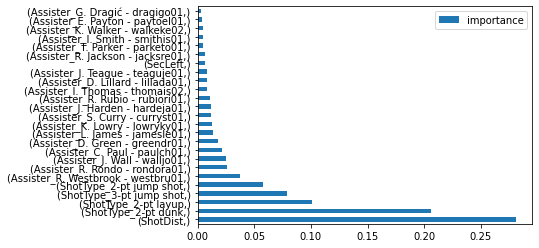

In [168]:
feature_imp.head(25).plot(kind = 'barh')